In [ ]:
 # Kaggle :
# 1. Create an account on Kaggle
# 2. Go to Setting and Verify your phone
# 3. In settings, Create a New API and save the kaggle.json file with you on your system.
# 4. Please make sure that you have accepted the RULE of competition

# Colab:
# 1. Upload your kaggle.json file on Colab
# 2. import kaggle (it will fail)
# 3. move the kaggle.json file to /root/.kaggle
# 4. import kaggle (again, this time it will work)
# 5. Go to the kaggle competition and copy the download command
# 6. paste the download command and enjoy!

In [ ]:
import kaggle

OSError: ignored

In [ ]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:30<00:00, 33.6MB/s]
100% 812M/812M [00:30<00:00, 27.9MB/s]


In [ ]:
! unzip -q dogs-vs-cats.zip
# -q to make the process NON verbose

In [ ]:
# sampleSubmission.csv and test1.zip is of NO use for us
# untill and unless you are submitting your results on Kaggle back.

In [ ]:
! unzip -q train.zip

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import tensorflow as tf

In [ ]:
len(os.listdir("train")) # share the content inside that particular folder

25000

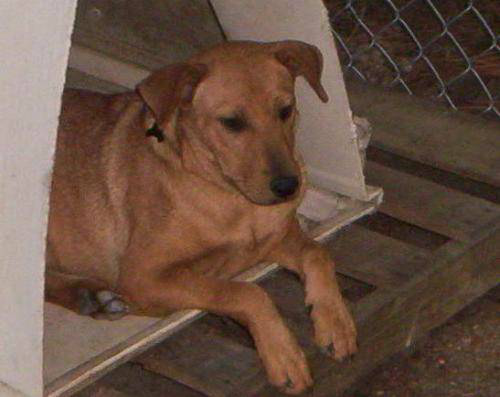

In [ ]:
Image.open("train/dog.100.jpg")

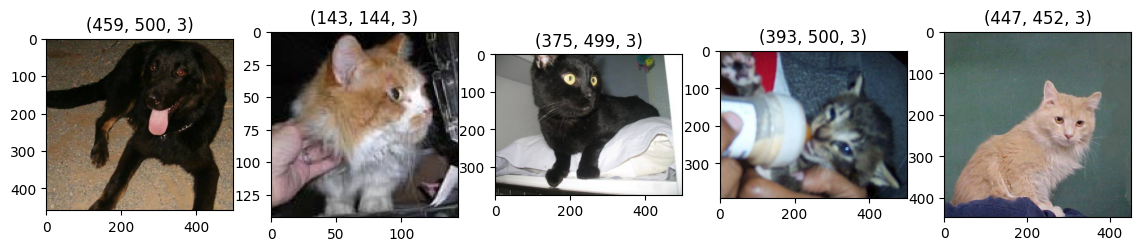

In [ ]:
plt.figure(figsize=(14, 8))
for i in range(1, 6):
  plt.subplot(1, 5, i)
  image = "train/" + np.random.choice(os.listdir("train"))
  image = cv2.imread(image)
  plt.title(image.shape)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)

In [ ]:
# Ques: Find the best shape for images to be resized ?
# for this session we will take it as (150,150)

In [ ]:
np.array([170, 168, 172, 180, 160, 280]).mean()

188.33333333333334

In [ ]:
np.median(np.array([170, 168, 172, 180, 160, 280]))

171.0

In [ ]:
# In MNIST and FashionMNIST dataset we had the x_train and y_train np.array.....
# Today for Dogs-vs-Cats we donot have an array

# Create a x_train and y_train ./\.
# x_train.shape --> (25000, 150, 150, 3)    # No of Images, Height, Width, Channel

In [ ]:
# Create a list
# Append all images (after processing) in list
# Convert that list into array

In [ ]:
allImages = []
allLabels = []
for imageName in os.listdir("train"): #iterate over the train folder to get all the files
  imageName = "train/" + imageName    #add folder name in the filename
  # raed the images
  image = cv2.imread(imageName)
  # convert from BGR2RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # resize the image to (150,150)
  image = cv2.resize(image, (150, 150))
  # normalize the images
  # image = image/255.0
  allImages.append(image)

  if "dog" in imageName:
    allLabels.append(1)
  else:
    allLabels.append(0)

In [ ]:
print(f"Length of allImages: {len(allImages)}")
print(f"Length of allLabels: {len(allLabels)}")

Length of allImages: 25000
Length of allLabels: 25000


In [ ]:
X = np.array(allImages)

In [ ]:
Y = np.array(allLabels)

In [ ]:
print(X.shape) # no. of images, height, width, channel
print(Y.shape) # no. of labeles

(25000, 150, 150, 3)
(25000,)


In [ ]:
# Split X into x_train, x_test, similarly Y into y_train and y_test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)

In [ ]:
X_train.shape, y_train.shape

((22500, 150, 150, 3), (22500,))

In [ ]:
X_test.shape, y_test.shape

((2500, 150, 150, 3), (2500,))